# Определение перспективного тарифа для телеком-компании

Клиентам федерального оператора сотовой связи предлагаются два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше?

Ход исследования:

Данные мы получим из файлов:
* 'calls.csv' - информация по звонкам;
* 'internet.csv' - информация об интернет-сессиях;
* 'messages.csv' - информация о сообщениях;
* 'tariffs.csv' - информация о тарифах;
* 'users.csv' - информация о пользователях.

О качестве данных ничего не известно. Поэтому перед проведением исследовательского анализа нам понадобится сделать их обзор.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить наиболее критичные ошибки.

Таким образом, исследование пройдет в несколько этапов:

1. Изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Откроем файлы с данными, выведем содержание каждого датафрейма и получим общую информацию.

### Информация о звонках

In [2]:
# информация о звонках
calls_df = pd.read_csv('calls.csv', sep=',')
display(calls_df.head(5))
calls_df.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице четыре столбца:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

В каждой строке таблицы — данные о звонках абонентов. В датасете нет пропусков, но тип данных в колонке call_date не соответствует документации. 

### Информация об интернет-сессиях

In [3]:
# информация об интернет-сессиях
internet_df = pd.read_csv('internet.csv', sep=',')
display(internet_df.head(5))
internet_df.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице пять столбцов:
* Unnamed: 0 - неизвестный столбец с индексами (лишний)
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

В каждой строке таблицы — данные об интернет-сессиях абонентов. В датасете нет пропусков, но есть лишний неописанный столбец 'Unnamed: 0'; кроме того, тип данных в колонке session_date не соответствует документации.

### Информация о сообщениях

In [4]:
# информация о сообщениях
messages_df = pd.read_csv('messages.csv', sep=',')
display(messages_df.head(5))
messages_df.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

В каждой строке таблицы — данные о сообщениях абонентов. В датасете нет пропусков, но тип данных в колонке message_date не соответствует документации.

### Информация о тарифах

In [5]:
# информация о тарифах
tariffs_df = pd.read_csv('tariffs.csv', sep=',')
display(tariffs_df.head(5))
tariffs_df.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице восемь столбцов:
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В каждой строке таблицы — данные о тарифе. В датасете нет пропусков, тип данных в каждой колонке соответствует документации.

### Информация о пользователях

In [6]:
# информация о пользователях
users_df = pd.read_csv('users.csv', sep=',')
display(users_df.head(5))
users_df.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице восемь столбцов:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

В каждой строке таблицы — данные о звонках абонентов. В датасете есть пропуски в колонке churn_date, кроме того тип данных в этой колонке, а также в reg_date не соответствует документации.

### Вывод

Предварительно можно утверждать, что данных достаточно для проведения исследования. Но типы данных в некоторых колонках датасетов не соответствуют документации. Кроме того, нужно проверить данные на наличие ошибок, и, если они есть, исправить их.

## Предобработка данных

### Пропущенные значения

Пропущенных значений в столбце churn_date означают, что на момент выгрузки данных тариф еще действовал. 
Поэтому обрабатывать пропуски в этом столбце не будем.

### Изменение типов данных

Изменим типы данных в столбцах, чтобы они соответствовали предоставленной документации. 

Сначала округлим значения столбца duration calls_df в соответствии с бизнес-процессами: сотовый оператор всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [7]:
# округлим до целого значения в большус сторону значения в столбце duration датасета calls_df
calls_df['duration'] = np.ceil(calls_df['duration'])

display(calls_df.head(5))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Теперь изменим типы данных в столбцах и проверим полученные датасеты:

In [8]:
# изменим тип данных в столбце duration датасета calls_df на int
calls_df['duration'] = calls_df['duration'].astype('int')

# изменим тип данных в столбце call_date датасета calls_df на datetime64:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

# изменим тип данных в столбце session_date датасета internet_df на datetime64:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

# изменим тип данных в столбце message_date датасета messages_df на datetime64:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

# изменим тип данных в столбце churn_date и reg_date датасета users_df на datetime64:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [9]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [10]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Ошибки в данных

Исследуем данные на наличие ошибок. 
Сначала проанализируем статистические данные с распределением значений каждого датасета:

In [12]:
display(calls_df.describe())
display(internet_df.describe())
display(messages_df.describe())
display(users_df.describe())
display(tariffs_df.describe())

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Также проанализируем гистограммы по ключевым метрикам:</div>

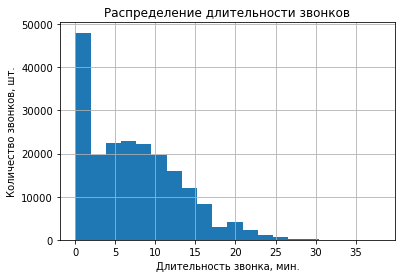

In [13]:
# гистограмма по длительности звонков
plt.title("Распределение длительности звонков")
plt.xlabel("Длительность звонка, мин.")
plt.ylabel("Количество звонков, шт.") 
calls_df.duration.hist(bins=20);

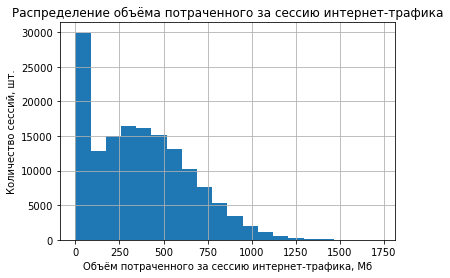

In [14]:
# гистограмма по объёму потраченного за сессию интернет-трафика
plt.title("Распределение объёма потраченного за сессию интернет-трафика")
plt.xlabel("Объём потраченного за сессию интернет-трафика, Мб")
plt.ylabel("Количество сессий, шт.") 
internet_df.mb_used.hist(bins=20);

В датафрейме tariffs_df единицы измерения и значения в столбце mb_per_month_included не соответствуют заявленному описанию тарифов:
- Тариф «Смарт»: включено 15 Гб интернет-трафика
- Тариф «Ультра»: включено 30 Гб интернет-трафика

Сделаем необходимые корректировки в tariffs_df:

In [15]:
#изменим единицы измерения с mb на gb
tariffs_df = tariffs_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
#приведем значения в соответствие с описанием тарифов
tariffs_df.loc[tariffs_df['tariff_name'] == 'smart', 'gb_per_month_included'] = 15
tariffs_df.loc[tariffs_df['tariff_name'] == 'ultra', 'gb_per_month_included'] = 30
display(tariffs_df)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Звонки с нулевой продолжительностью в датасете calls_df не являются ошибкой: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

В датасете internet_df отбросим лишний неописанный в документации столбец 'Unnamed: 0':

In [16]:
internet_df = internet_df.drop(['Unnamed: 0'], 1)

Некоторые пользователи из датасета меняли тариф, о чем свидетельствует столбец churn_date, в котором указана дата прекращения пользования тарифом. Примем это во внимание при дальнейшем анализе данных.

In [17]:
display(users_df[~users_df['churn_date'].isna()].head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


В данных были найдены и исправлены следующие ошибки:
* в датафрейме tariffs_df значения и единицы измерения в столбце включенного ежемесячного траффика не соответствовали описанию тарифов;
* в датасете internet_df был отброшен лишний неописанный в документации столбец 'Unnamed: 0'.

## Расчёты и добавление результатов

Для дальнейшего анализа сформируем для каждого пользователя ежемесячную статистику по количеству сделанных звонков и израсходованных минут разговора, количеству отправленных сообщений, объему израсходованного интернет-трафика и помесячной выручки.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Добавим в датасет calls_df соответствующие столбцы:

In [18]:
#добавим в calls_df столбец month, в котором запишем месяц звонка
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.month

#посчитаем для каждого пользоватля количество сделанных звонков и израсходованных минут по месяцам
calls_stat = calls_df.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()
calls_stat.columns = ['user_id','month','total_calls','total_duration']
display(calls_stat.head(5))
display(calls_stat.info())
print(calls_stat.user_id.nunique())

,user_id,month,total_calls,total_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3174 non-null   int64
 1   month           3174 non-null   int64
 2   total_calls     3174 non-null   int64
 3   total_duration  3174 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 86.9 KB


None

492


### Количество отправленных сообщений по месяцам

Добавим в датасет messages_df соответствующие столбцы:

In [19]:
#добавим в messages_df столбец month, в котором запишем месяц отправленного сообщения:
messages_df['month'] = pd.to_datetime(messages_df['message_date']).dt.month

#посчитаем для каждого пользоватля количество отправленных сообщений по месяцам
messages_stat = messages_df.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).reset_index()
messages_stat.columns = ['user_id','month','total_messages']
display(messages_stat.head(5))
display(messages_stat.info())
print(messages_stat.user_id.nunique())

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   total_messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


None

426


### Объем израсходованного интернет-трафика по месяцам

Добавим в датасет internet_df соответствующие столбцы:

In [20]:
#добавим в internet_df столбец month, в котором запишем месяц сессии:
internet_df['month'] = pd.to_datetime(internet_df['session_date']).dt.month

#посчитаем для каждого пользоватля объем израсходованного интернет-трафика по месяцам
internet_stat = internet_df.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum']).reset_index()
internet_stat.columns = ['user_id','month','total_traffic']
display(internet_stat.head(5))
display(internet_stat.info())
print(internet_stat.user_id.nunique())

,user_id,month,total_traffic
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3203 non-null   int64  
 1   month          3203 non-null   int64  
 2   total_traffic  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


None

497


Мы помним о том, что сотовый оператор всегда округляет мегабайты — до гигабайт. Поэтому округлим общую сумму траффика за месяц в бо́льшую сторону до гигабайт:

In [21]:
internet_stat['total_traffic'] /= 1024
internet_stat = np.ceil(internet_stat).astype('int')
display(internet_stat.head(5))

,user_id,month,total_traffic
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


### Помесячная выручка с каждого пользователя

Для подсчета помесячной выручки сначала объединим таблицы calls_stat, messages_stat и internet_stat по значениям user_id и month:

In [22]:
# объединим calls_stat и messages_stat по user_id и month
full_stat = calls_stat.merge(messages_stat, on=['user_id','month'], how='outer')
# объединим full_stat с internet_stat по user_id и month
full_stat = full_stat.merge(internet_stat, on=['user_id','month'], how='outer')

display(full_stat.head(5))

,user_id,month,total_calls,total_duration,total_messages,total_traffic
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


In [23]:
display(full_stat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   total_calls     3174 non-null   float64
 3   total_duration  3174 non-null   float64
 4   total_messages  2717 non-null   float64
 5   total_traffic   3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


None

In [24]:
print("Количество уникальных пользователей:", full_stat.user_id.nunique())

Количество уникальных пользователей: 498


На следующем шаге присоединим к full_stat информацию по юзерам и тарифам:

In [25]:
full_stat = users_df.merge(full_stat, on=['user_id'], how='inner')

Проверим полученный датасет full_stat:

In [26]:
display(full_stat.head(5))
full_stat.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_calls,total_duration,total_messages,total_traffic
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22.0,159.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43.0,172.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47.0,340.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52.0,408.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58.0,466.0,57.0,15.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   age             3214 non-null   int64         
 2   churn_date      187 non-null    datetime64[ns]
 3   city            3214 non-null   object        
 4   first_name      3214 non-null   object        
 5   last_name       3214 non-null   object        
 6   reg_date        3214 non-null   datetime64[ns]
 7   tariff          3214 non-null   object        
 8   month           3214 non-null   int64         
 9   total_calls     3174 non-null   float64       
 10  total_duration  3174 non-null   float64       
 11  total_messages  2717 non-null   float64       
 12  total_traffic   3203 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 351.5+ KB


Видим, что при объединении талиц в full_stat появились пропуски в столбцах total_calls, total_duration, total_messages и total_traffic. Вероятная причина связана с тем, что некоторые абоненты в какие-то месяцы не делали звонков, не отправляли сообщения или не пользовались интернетом. 

Пропуски в этих столбцах правильно заменить на '0':

In [27]:
full_stat['total_calls'] = full_stat['total_calls'].fillna(0)
full_stat['total_duration'] = full_stat['total_duration'].fillna(0)
full_stat['total_messages'] = full_stat['total_messages'].fillna(0)
full_stat['total_traffic'] = full_stat['total_traffic'].fillna(0)

full_stat['total_calls'] = full_stat['total_calls'].astype('int')
full_stat['total_duration'] = full_stat['total_duration'].astype('int')
full_stat['total_messages'] = full_stat['total_messages'].astype('int')
full_stat['total_traffic'] = full_stat['total_traffic'].astype('int')

full_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   age             3214 non-null   int64         
 2   churn_date      187 non-null    datetime64[ns]
 3   city            3214 non-null   object        
 4   first_name      3214 non-null   object        
 5   last_name       3214 non-null   object        
 6   reg_date        3214 non-null   datetime64[ns]
 7   tariff          3214 non-null   object        
 8   month           3214 non-null   int64         
 9   total_calls     3214 non-null   int32         
 10  total_duration  3214 non-null   int32         
 11  total_messages  3214 non-null   int32         
 12  total_traffic   3214 non-null   int32         
dtypes: datetime64[ns](2), int32(4), int64(3), object(4)
memory usage: 301.3+ KB


С пропусками разобрались, можно двигаться дальше.

Чтобы посчитать помесячную выручку, необходимо вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Далее остаток умножить на значение из тарифного плана и прибавить абонентскую плату, соответствующую тарифному плану. 

Для этого создадим функцию monthly_revenue, которая проделает эти вычисления для каждого пользователя:

In [28]:
def monthly_revenue (user_data):    
    total_revenue = 0
    calls_diff = 0
    messages_diff = 0
    traffic_diff = 0
    t_name = user_data["tariff"]
    
    tariff = tariffs_df.query('tariff_name == @t_name') #определим параметры тарифа пользователя

    total_revenue = tariff.rub_monthly_fee  #добавим к месячной выручке базовую абонентскую плату
    
    #добавим к месячной выручке плату за звонки сверх пакета в тарифе
    calls_diff = int(user_data.total_duration - tariff.minutes_included)
    if calls_diff < 0:
        calls_diff = 0
    total_revenue += int(calls_diff*tariff.rub_per_minute)
    
    #добавим к месячной выручке плату за сообщения сверх пакета в тарифе
    messages_diff = int(user_data.total_messages - tariff.messages_included)
    if messages_diff < 0:
        messages_diff = 0
    total_revenue += int(messages_diff*tariff.rub_per_message)
    
    #добавим к месячной выручке плату за траффик сверх пакета в тарифе
    traffic_diff = int(user_data.total_traffic - tariff.gb_per_month_included)
    if traffic_diff < 0:
        traffic_diff = 0
    total_revenue += int(traffic_diff*tariff.rub_per_gb)
    
    return int(total_revenue)

#добавим в full_stat месячную выручку, используя monthly_revenue
full_stat['monthly_revenue'] = full_stat.apply(monthly_revenue, axis=1)
display(full_stat.head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_calls,total_duration,total_messages,total_traffic,monthly_revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,3,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,15,1950


Мы помним, что в датасете users_df присутствовали пользователи, прекратившие пользоваться услугами оператора. Об этом свидетельствует столбец churn_date, в котором указана дата прекращения пользования тарифом. Проанализируем такие строки:

In [29]:
display(full_stat[~full_stat.churn_date.isnull()].head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_calls,total_duration,total_messages,total_traffic,monthly_revenue
136,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,5,37,300,21,11,1950
137,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,6,52,386,25,22,1950
138,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,7,60,453,16,18,1950
139,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,8,47,360,19,28,1950
140,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,9,84,519,21,16,1950


Для таких пользователей статистика по метрикам в последний месяц использования тарифа является выбросом, удалим данные строки из датасета full_stat: 

In [30]:
full_stat = full_stat[pd.to_datetime(full_stat['churn_date']).dt.month != full_stat['month']]
full_stat = full_stat.reset_index(drop=True)

### Вывод:

Мы провели требуемые расчеты и получили данные, необходимые для проведения исследовательского анализа.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки.

Сначала проналазируем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

Для этого найдем среднее, дисперсию и стандартное отклонение для каждой метрики в зависимости от тарифа:

In [31]:
metrics_expectation = full_stat.pivot_table(index='tariff', values=['total_duration', 'total_messages', 'total_traffic'], aggfunc=['mean', 'var', 'std']).reset_index()
metrics_expectation.columns = ['tariff','duration_mean', 'messages_mean', 'traffic_mean', 'duration_variance', 'messages_variance', 'traffic_variance', 'duration_std', 'messages_std', 'traffic_std']
display(metrics_expectation)

,tariff,duration_mean,messages_mean,traffic_mean,duration_variance,messages_variance,traffic_variance,duration_std,messages_std,traffic_std
0,smart,419.880834,33.518804,16.384232,36093.353427,800.812770,32.839606,189.982508,28.298635,5.730585
1,ultra,531.511843,49.792997,19.690010,100403.169705,2296.141642,95.298653,316.864592,47.918072,9.762103


Далее построим гистограммы для каждой метрики:

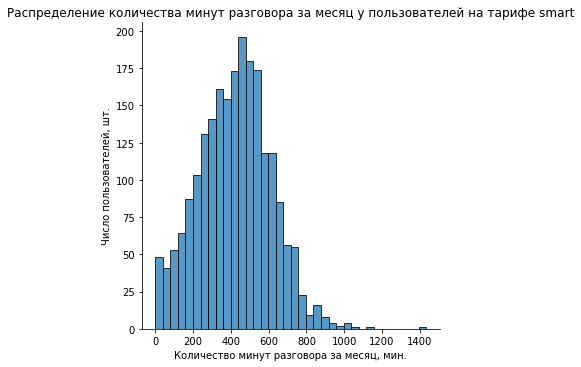

In [32]:
#разделим full_stat на две выборки в зависмости от тарифа
tariff_smart_stat = full_stat.query('tariff == "smart"')
tariff_ultra_stat = full_stat.query('tariff == "ultra"')

#гистограмма для количества минут разговора за месяц у пользователей на тарифе smart
sns.displot(tariff_smart_stat['total_duration'])
plt.title("Распределение количества минут разговора за месяц у пользователей на тарифе smart")
plt.xlabel("Количество минут разговора за месяц, мин.")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

По графику видим, что данные скошены в отрицательную сторону; медиана больше, чем среднее.

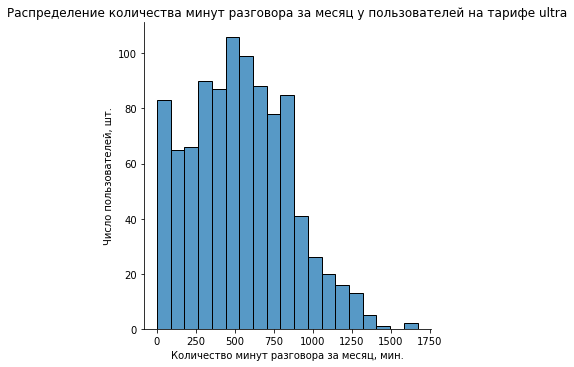

In [33]:
#гистограмма для количества минут разговора за месяц у пользователей на тарифе ultra
sns.displot(tariff_ultra_stat['total_duration'])
plt.title("Распределение количества минут разговора за месяц у пользователей на тарифе ultra")
plt.xlabel("Количество минут разговора за месяц, мин.")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

Данные скошены в отрицательную сторону; медиана больше, чем среднее.

По графикам видим, что пользователи тарифа «Смарт», в среднем, общаются 425 минут в месяц, а пользователи 
тарифа «Ультра» - 533 минут в месяц.

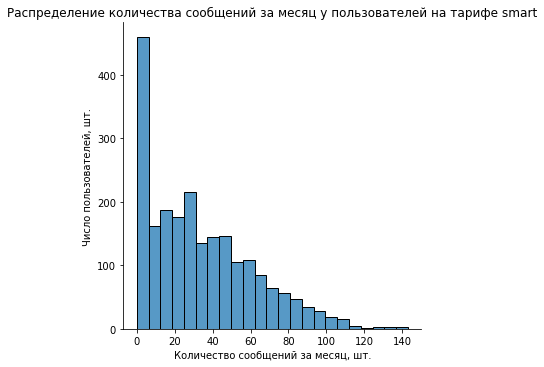

In [34]:
#гистограмма для количества сообщений за месяц у пользователей на тарифе smart
sns.displot(tariff_smart_stat['total_messages'])
plt.title("Распределение количества сообщений за месяц у пользователей на тарифе smart")
plt.xlabel("Количество сообщений за месяц, шт.")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

Данные скошены в положительную сторону, среднее больше, чем медиана.

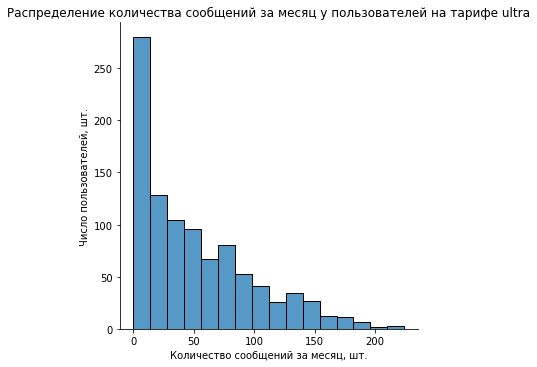

In [35]:
#гистограмма для количества сообщений за месяц у пользователей на тарифе ultra
sns.displot(tariff_ultra_stat['total_messages'])
plt.title("Распределение количества сообщений за месяц у пользователей на тарифе ultra")
plt.xlabel("Количество сообщений за месяц, шт.")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

Данные скошены в положительную сторону, среднее больше, чем медиана.

Большинство пользователей обоих тарифов не отправляют сообщения. 
По остальным статистика такова: пользователи тарифа «Смарт», в среднем, отправляют 28 сообщений в месяц, а 
тарифа «Ультра» - 39 сообщений в месяц.

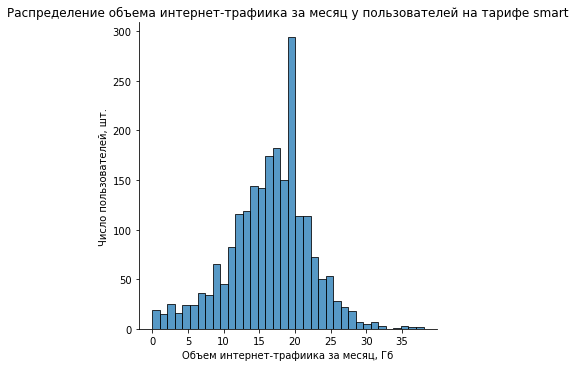

In [36]:
#гистограмма для объема интернет-трафиика за месяц у пользователей на тарифе smart
sns.displot(tariff_smart_stat['total_traffic'])
plt.title("Распределение объема интернет-трафиика за месяц у пользователей на тарифе smart")
plt.xlabel("Объем интернет-трафиика за месяц, Гб")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

Набор данных практически симметричен; медина близка к среднему.

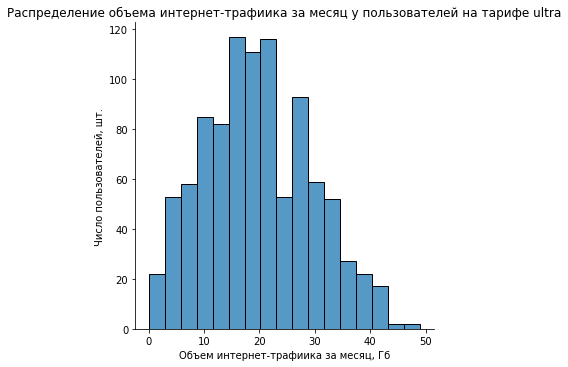

In [37]:
#гистограмма для объема интернет-траффика за месяц у пользователей на тарифе ultra
sns.displot(tariff_ultra_stat['total_traffic'])
plt.title("Распределение объема интернет-трафиика за месяц у пользователей на тарифе ultra")
plt.xlabel("Объем интернет-трафиика за месяц, Гб")
plt.ylabel("Число пользователей, шт.") 
plt.show(); 

Набор данных практически симметричен; медина близка к среднему.

Пользователи тарифа «Смарт», в среднем, потребляют 17 Гб траффика в месяц, а пользователи 
тарифа «Ультра» - 20 Гб в месяц.

## Проверка гипотез

Мы хотим проверим следующие гипотезы:
* Двухсторонняя проверка: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* Двухсторонняя проверка: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для удобства уберем из tariff_smart_stat и tariff_ultra_stat лишние данные, оставив только столбцы с основной информацией о пользователе и значением помесячной выручки:

In [38]:
tariff_smart_stat = tariff_smart_stat[['user_id', 'city', 'first_name', 'last_name', 'tariff', 'month', 'monthly_revenue']]
tariff_ultra_stat = tariff_ultra_stat[['user_id', 'city', 'first_name', 'last_name', 'tariff', 'month', 'monthly_revenue']]
display(tariff_smart_stat.head(5))
display(tariff_ultra_stat.head(5))

,user_id,city,first_name,last_name,tariff,month,monthly_revenue
8,1001,Москва,Иван,Ежов,smart,11,1150
9,1001,Москва,Иван,Ежов,smart,12,550
10,1002,Стерлитамак,Евгений,Абрамович,smart,6,550
11,1002,Стерлитамак,Евгений,Абрамович,smart,7,1150
12,1002,Стерлитамак,Евгений,Абрамович,smart,8,1550


,user_id,city,first_name,last_name,tariff,month,monthly_revenue
0,1000,Краснодар,Рафаил,Верещагин,ultra,5,1950
1,1000,Краснодар,Рафаил,Верещагин,ultra,6,1950
2,1000,Краснодар,Рафаил,Верещагин,ultra,7,1950
3,1000,Краснодар,Рафаил,Верещагин,ultra,8,1950
4,1000,Краснодар,Рафаил,Верещагин,ultra,9,1950


### Проверка нормальности распределения средней выручки по тарифам

Сначала проверим нормальности распределения средней выручки пользователей по тарифам:

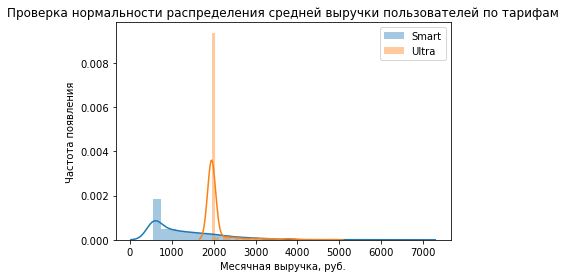

In [39]:
sns.distplot(tariff_smart_stat['monthly_revenue'], label='Smart');
sns.distplot(tariff_ultra_stat['monthly_revenue'], label='Ultra');
plt.title("Проверка нормальности распределения средней выручки пользователей по тарифам")
plt.xlabel("Месячная выручка, руб.")
plt.ylabel("Частота появления")
plt.legend() 
plt.show(); 

**Проверка распределения при помощи QQ-графиков**

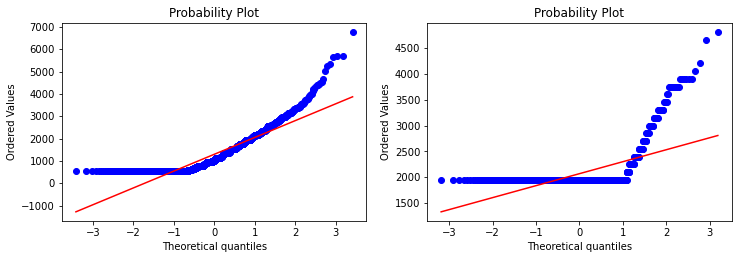

In [40]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
st.probplot(tariff_smart_stat['monthly_revenue'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(tariff_ultra_stat['monthly_revenue'], dist="norm", plot=plt)
plt.show()

В соответствии с графиками делаем вывод, что средние выручки пользователей распределены не нормально.

**Проверка при помощи критерия Шапиро-Уилка:**

Критерий Шапиро-Уилка:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ выручки \ пользователей \ распределены \ нормально.}\\
        H_{1}: {Средние \ выручки \ пользователей \ распределены \ не \ нормально.}
    \end{array}
\right.
$$

In [41]:
print("W-statistic: %f, p-value: %f" % st.shapiro(tariff_smart_stat['monthly_revenue']))
print("W-statistic: %f, p-value: %f" % st.shapiro(tariff_ultra_stat['monthly_revenue']))

W-statistic: 0.843990, p-value: 0.000000
W-statistic: 0.370645, p-value: 0.000000


Отвергаем нулевую гипотезу: распределения не являются нормальными.

### Двухсторонняя проверка: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Введем основную и альтернативную гипотезы:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средняя \ выручка \ пользователей \ тарифов \ «Ультра» \ и \ «Смарт» \ одинакова.}\\
        H_{1}: {Средняя \ выручка \ пользователей \ тарифов \ «Ультра» \ и \ «Смарт» \ различаются.}
    \end{array}
\right.
$$

Уровень значимости: α = 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Если p-value будет меньше α, то нулевую гипотезу о равенстве средних выручек пользователей отвергаем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Применим ttest к выручкам по тарифу «Ультра» и «Смарт»:

In [42]:
alpha = 0.05

results = st.ttest_ind(tariff_smart_stat['monthly_revenue'], tariff_ultra_stat['monthly_revenue'], equal_var=False)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0524028399519643e-243
Отвергаем нулевую гипотезу


Также проверим гипотезу с помощью непараметрического теста Мана-Уитни:

In [43]:
alpha = 0.05

results = st.mannwhitneyu(tariff_smart_stat['monthly_revenue'], tariff_ultra_stat['monthly_revenue'])
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.993470384190396e-183
Отвергаем нулевую гипотезу


**Вывод:** p-value получилось меньше выбранного уровня α = 0.05. Поэтому отвергаем нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Односторонняя проверка: средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт»

Введем основную и альтернативную гипотезы:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средняя \ выручка \ пользователей \ тарифов \ «Ультра» \ и \ «Смарт» \ одинакова.}\\
        H_{1}: {Средняя \ выручка \ пользователей \ тарифа \ «Ультра» \ больше \ средней \ выручки \ пользователей \ тарифа\ «Смарт».}
    \end{array}
\right.
$$

Уровень значимости: α = 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Если p-value будет меньше α, то нулевую гипотезу о равенстве средних выручек пользователей отвергаем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.



In [44]:
alpha = 0.05

results = st.ttest_ind(tariff_ultra_stat['monthly_revenue'], tariff_smart_stat['monthly_revenue'], equal_var=False)
print("p-значение:", results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (tariff_ultra_stat['monthly_revenue'].mean() > tariff_smart_stat['monthly_revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.2620141997598215e-244
Отвергаем нулевую гипотезу


Проверим вторым способом: применим ttest к выручкам по тарифу «Ультра» и «Смарт» и используем параметр alternative = 'greater'.

In [45]:
alpha = 0.05

results = st.ttest_ind(tariff_ultra_stat['monthly_revenue'], tariff_smart_stat['monthly_revenue'], equal_var=False, alternative ='greater')
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.2620141997598215e-244
Отвергаем нулевую гипотезу


**Вывод:** p-value получилось меньше выбранного уровня α = 0.05. Поэтому отвергаем нулевую гипотезу: средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».

### Проверка нормальности распределения средней выручки пользователей из Москвы и из других городов

Подготовим выборки для проверки гипотез:

In [46]:
#разделим full_stat на две выборки в зависмости от тарифа
moscow_stat = full_stat.query('city == "Москва"')
other_cities_stat = full_stat.query('city != "Москва"')

#уберем лишние столбцы
moscow_stat = moscow_stat[['user_id', 'city', 'first_name', 'last_name', 'tariff', 'month', 'monthly_revenue']]
other_cities_stat = other_cities_stat[['user_id', 'city', 'first_name', 'last_name', 'tariff', 'month', 'monthly_revenue']]

display(moscow_stat.head(5))
display(other_cities_stat.head(5))

,user_id,city,first_name,last_name,tariff,month,monthly_revenue
8,1001,Москва,Иван,Ежов,smart,11,1150
9,1001,Москва,Иван,Ежов,smart,12,550
17,1003,Москва,Белла,Белякова,ultra,8,1950
18,1003,Москва,Белла,Белякова,ultra,9,1950
19,1003,Москва,Белла,Белякова,ultra,10,1950


,user_id,city,first_name,last_name,tariff,month,monthly_revenue
0,1000,Краснодар,Рафаил,Верещагин,ultra,5,1950
1,1000,Краснодар,Рафаил,Верещагин,ultra,6,1950
2,1000,Краснодар,Рафаил,Верещагин,ultra,7,1950
3,1000,Краснодар,Рафаил,Верещагин,ultra,8,1950
4,1000,Краснодар,Рафаил,Верещагин,ultra,9,1950


Проверим нормальности распределения средней выручки пользователей из Москвы и из других городов:

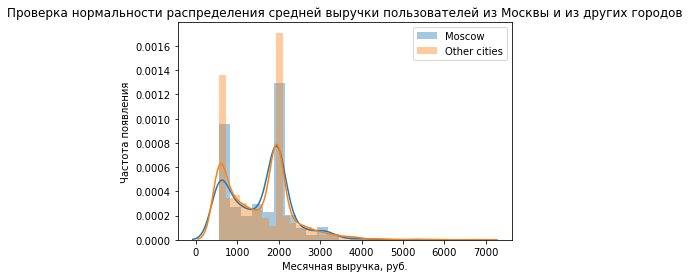

In [47]:
sns.distplot(moscow_stat['monthly_revenue'], label='Moscow');
sns.distplot(other_cities_stat['monthly_revenue'], label='Other cities')
plt.title("Проверка нормальности распределения средней выручки пользователей из Москвы и из других городов")
plt.xlabel("Месячная выручка, руб.")
plt.ylabel("Частота появления")
plt.legend() 
plt.show(); 

**Проверка распределения при помощи QQ-графиков**

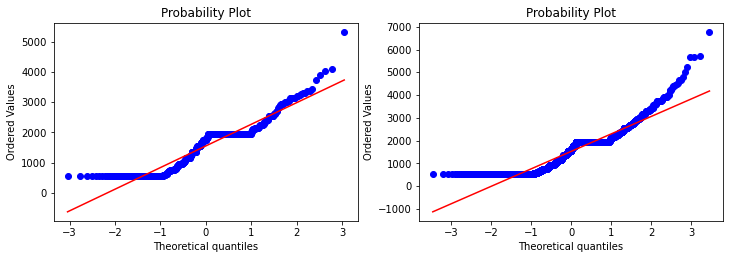

In [48]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
st.probplot(moscow_stat['monthly_revenue'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(other_cities_stat['monthly_revenue'], dist="norm", plot=plt)
plt.show()

В соответствии с графиками делаем вывод, что средние выручки пользователей распределены не нормально.

**Проверка при помощи критерия Шапиро-Уилка:**

Критерий Шапиро-Уилка:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средние \ выручки \ пользователей \ распределены \ нормально.}\\
        H_{1}: {Средние \ выручки \ пользователей \ распределены \ не \ нормально.}
    \end{array}
\right.
$$

In [49]:
print("W-statistic: %f, p-value: %f" % st.shapiro(moscow_stat['monthly_revenue']))
print("W-statistic: %f, p-value: %f" % st.shapiro(other_cities_stat['monthly_revenue']))

W-statistic: 0.902852, p-value: 0.000000
W-statistic: 0.895877, p-value: 0.000000


Отвергаем нулевую гипотезу: распределения не являются нормальными.

### Двухсторонняя проверка: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Введем основную и альтернативную гипотезы:

$$
\left\{
    \begin{array}\\
        H_{0}: {Средняя \ выручка \ пользователей \ из \ Москвы \ и \ из \ других \ регионов \ одинакова.}\\
        H_{1}: {Средняя \ выручка \ пользователей \ из \ Москвы \ отличается \ от \ выручки \ пользователей \ из \ других \ регионов.}
    \end{array}
\right.
$$

Уровень значимости: α = 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Если p-value будет меньше α, то нулевую гипотезу о равенстве средних отвергаем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Применим ttest к выручкам пользователей из Москвы и из других городов:

In [50]:
alpha = 0.05

results = st.ttest_ind(moscow_stat['monthly_revenue'], other_cities_stat['monthly_revenue'], equal_var=False)
print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4429886874790373
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-value получилось больше выбранного уровня α = 0.05. Поэтому данные не позволили нам отвергнуть нулевую гипотезу: средняя выручка пользователей из Москвы и из других городов отличается, но с большой вероятностью такое различие можно получить случайно.

### Вывод:

На основании проведенного исследования мы мы получили следующие результаты относительно поведения клиентов сотового оператора:
* Пользователи тарифа «Смарт», в среднем, общаются 425 минут в месяц, а пользователи тарифа «Ультра» - 533 минут в месяц.
* Большинство пользователей обоих тарифов не отправляют сообщения. По остальным статистика такова: пользователи тарифа «Смарт», в среднем, отправляют 28 сообщений в месяц, а тарифа «Ультра» - 39 сообщений в месяц.
* Пользователи тарифа «Смарт», в среднем, потребляют 17 Гб траффика в месяц, а пользователи тарифа «Ультра» - 20 Гб в месяц.
* На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
* На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу: средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».
* На имеющихся данных, на уровне значимости 5%, есть основание не от отвергать нулевую гипотезу: средняя выручка пользователей из Москвы и из других городов отличается, однако с большой вероятностью такое различие можно получить случайно.

## Общий вывод

Для корректировки рекламного бюджета и подготовки ответа для коммерческого департамента сотового оператора мы использовали входные данные со статистикой 500 пользователей оператора за год.

Данные были проверены на наличие ошибок и оценки их влияния на исследование. Далее была выполнена предобработка данных, которая в себя включала поиск и заполнение пропущенных значений, а также поиск и обработку ошибок. 

После этого был проведен исследовательский анализ данных и проверены гипотезы: вывод с описанием полученных результатов доступен для каждого этапа исследования.

**Рекомендации коммерческому департаменту:** 

На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».